# Statistics 101

## Data Source

Data is taken from the study ["Predictors of severe or lethal COVID-19, including Angiotensin Converting Enzyme inhibitors and Angiotensin II Receptor Blockers, in a sample of infected Italian citizens"]( https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0235248)

The study's aim is to assess independent predictors of severe COVID-19. Special focus on provision of treatment provided during high blood pressure (ACE and ARB). Signigicant predicators were: age, male, diabetes, cardiovascular diseases (CVD), and chronic obstructive pulmonary disease (COPD). The conclusion of the study: cardiovascular treatment should be continued as normal in case of infection.

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import scipy.stats as st
import math
import statsmodels.stats.weightstats as stm

# Read csv into Dataframe
df = pd.read_excel("journal.pone.0235248.s001.xlsx")

df

,id,age,sex,diabetes,hypertension,cvd,copd,cancer,renal,ace,...,severe,death,ageclass,ageclass1,ageclass2,ageclass3,ageclass4,ageclass5,ageclass6,ageclass7
0,1,64.194389,0,0,0,0,0,0,0,0,...,0,0,69.989998,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,76.917183,1,0,1,1,0,0,0,0,...,1,1,79.989998,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,23.460644,0,0,0,0,0,0,0,0,...,0,0,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,30.447639,0,0,0,0,0,0,0,0,...,0,0,39.990002,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,55.299110,1,0,0,0,0,0,0,0,...,1,0,59.990002,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1599,53.000000,1,0,0,0,0,0,0,0,...,1,0,59.990002,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1599,1600,45.000000,0,0,0,0,0,0,0,0,...,0,0,49.990002,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1600,1601,56.000000,1,0,0,0,0,0,0,0,...,0,0,59.990002,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1601,1602,46.000000,1,0,0,0,0,0,0,0,...,0,0,49.990002,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Descriptive Statistics

First, the practice of data science begins with describing and understanding a given dataset. In descriptive statistics, we're interested in 2 aspects of data:
* its central tendency (mean, median, mode)
    * If data is normally distributed, we look at mean and 95%CI
    * if data is not normally distributed, we look at median and IQR
* its variability or spread (variance, standard deviation)

### Identify variables 

age, ageclass: continuous variables
others: categorical variables

### Create summary statistics of age

In [24]:
# Count number of NaN Values
df["age"].isnull().sum()

# Drop NaN values
age = df["age"].dropna()
age = age.to_numpy()

In [25]:
mean = stats.mean(age)
median = stats.median(age)
mode = stats.mode(age)
s_square = age.var(ddof=1)
s = age.std(ddof=1)

print("Mean: %.2f. Median: %.2f. Mode: %.2f. Sample variance: %.2f. Sample standard deviation: %.2f." % (mean, median, mode, s_square, s))

Mean: 58.02. Median: 58.00. Mode: 55.00. Sample variance: 438.12. Sample standard deviation: 20.93.


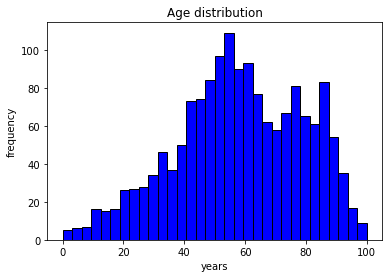

In [26]:
# Plot histogram and comment on the skewness
plt.hist(age, color='blue', edgecolor='black', bins=32)
plt.title("Age distribution")
plt.xlabel("years")
plt.ylabel("frequency")
plt.show()

### Calculate confidence interval

In [27]:
# sample size
n = len(age)

# standard error
std_err = s / math.sqrt(n)

# confidence level, significance level, and degrees of freedom
conf_lvl = 0.95
sig_lvl = 1 - conf_lvl
degree_freedom = n - 1

# confidence interval with t-distribution
ci_low_t, ci_upp_t = stm._tconfint_generic(mean,std_err, degree_freedom, alpha=sig_lvl, alternative="two-sided")
print("C.I. (t*): %.2f to %.2f. Interval size: %.2f." % (ci_low_t, ci_upp_t, ci_upp_t-ci_low_t))

C.I. (t*): 56.99 to 59.04. Interval size: 2.05.


### Calculate skewness and kurtosis

In [28]:
skewness = st.skew(age)
kurtosis = st.kurtosis(age, fisher =  False) # The Pearson’s definition will be used (normal 3.0).
print("Skewness: %.2f. Kurtosis: %.2f" % (skewness, kurtosis))

Skewness: -0.28. Kurtosis: 2.49


### Calculate IQR of age

In [29]:
pct25 = np.percentile(age, 25)
pct75 = np.percentile(age, 75)
iqr = pct75 - pct25
print("Median: %d. IQR: %d. 25th percentile: %d. 75th percentile: %d" % (median, iqr, pct25, pct75))

Median: 58. IQR: 31. 25th percentile: 44. 75th percentile: 75


Skewness, kurtosis, histogram suggests data are not normally distributed, we should use median instead of mean.

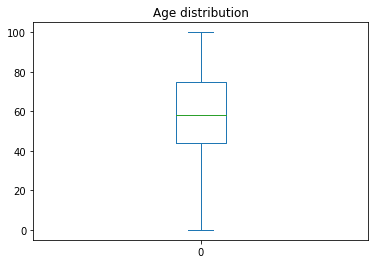

In [30]:
# Plot a box and whiskers plot to visualise age data
age_df = pd.DataFrame(age)
age_df.plot(kind='box', title='Age distribution')
plt.show()

Median and IQR match the box and whisker plot.

## Inferential Statistics

### Analysis: Check if mean age between males and females differs significantly

As age is not normally distributed, we use the Mann-Whitney U test for unpaired samples. 

In [31]:
# split DataFrame into two subsets: df1 for females, df2 for males
df1 = df[df["sex"] == 0]
df2 = df[df["sex"] == 1]

# Turn column into numpy array
sample1 = df1["age"].dropna()
sample1 = sample1.to_numpy()
sample2 = df2["age"].dropna()
sample2 = sample2.to_numpy()

#perform the Mann-Whitney U test
t_stats, p_val = st.mannwhitneyu(sample1, sample2, alternative='two-sided')
print("\n Computing t* ...")
print("\t t-statistic (t*): %.2f" % t_stats)

print("\n Computing p-value ...")
print("\t p-value: %.4f" % p_val)

if (p_val <0.05):
    print("Reject the Null Hypothesis")
else:
    print("Accept the Null Hypothesis")


 Computing t* ...
	 t-statistic (t*): 327951.00

 Computing p-value ...
	 p-value: 0.3798
Accept the Null Hypothesis


Null hypothesis: Mean age is equal between females and males

Alternative hypothesis: Mean age is different between females and males 

Since p-value = 0.38 > 0.05, we fail to reject the null hypothesis. Mean age between males and females doesn't differ significantly.

In [32]:
# Check median and IQR to confirm the inferential stats results

median1 = stats.median(sample1)
iqr1 = np.percentile(sample1, 75) - np.percentile(sample1, 25)

median2 = stats.median(sample2)
iqr2 = np.percentile(sample2, 75) - np.percentile(sample2, 25)

print("Sample 1: Median: %d. IQR: %d." % (median1, iqr1))
print("Sample 2: Median: %d. IQR: %d." % (median2, iqr2))

Sample 1: Median: 58. IQR: 33.
Sample 2: Median: 58. IQR: 27.


As a result, we can confirm that there is not siginificant difference between median age between males and females.

### Assuming age is normally distributed, we use the ttest

In [33]:
sample1_mean = stats.mean(sample1)
sample1_s = sample1.std(ddof=1)
n1 = len(sample1)

sample2_mean = stats.mean(sample2)
sample2_s = sample2.std(ddof=1)
n2 = len(sample2)

t_stats, p_value = st.ttest_ind_from_stats(sample1_mean, sample1_s, n1, sample2_mean, sample2_s, n2, 
                        equal_var=False, alternative='two-sided')

print("t-stats: %.2f" % t_stats)
print("p-val: %.2f" % p_val)

if (p_value <0.05):
    print("Reject the Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

t-stats: 1.03
p-val: 0.38
Accept the Null Hypothesis
